<a href="https://colab.research.google.com/github/rdchkulasinghe/NLP/blob/main/Day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd



In [3]:
# Corpus

corpus = [

    "I love Python programming",

    "Python is great for machine learning",

    "I love coding in Python"
]


In [4]:
#Bag-of-Words

vectorizer= CountVectorizer()
X = vectorizer.fit_transform(corpus)

#Convert to DataFrame for easy view
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(bow_df)

   coding  for  great  in  is  learning  love  machine  programming  python
0       0    0      0   0   0         0     1        0            1       1
1       0    1      1   0   1         1     0        1            0       1
2       1    0      0   1   0         0     1        0            0       1


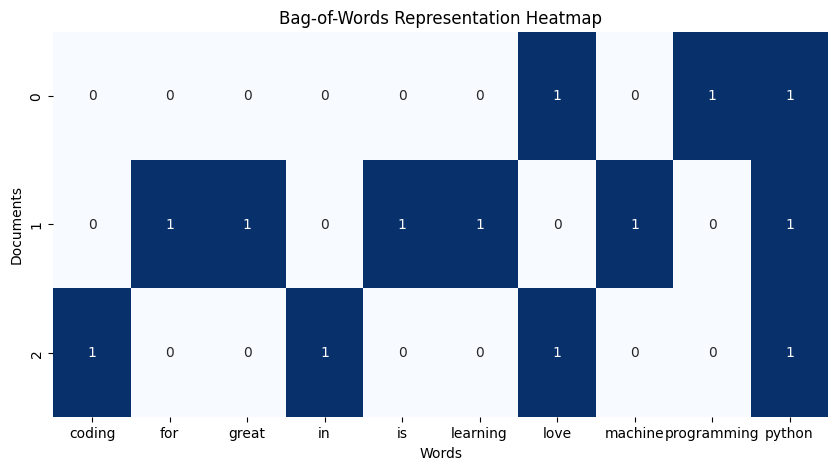

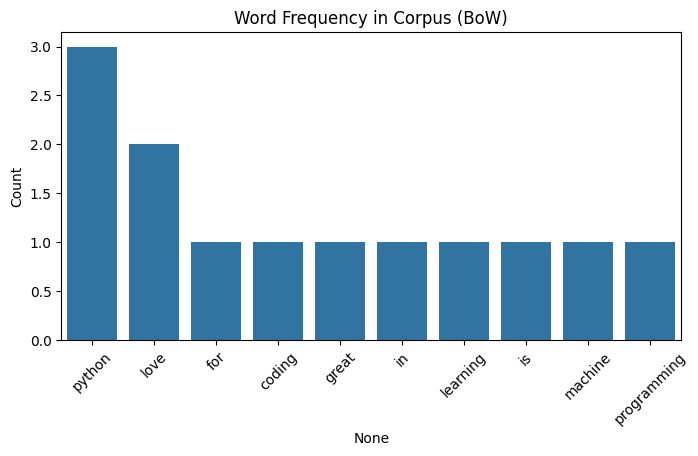

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(bow_df, annot =True, cmap="Blues", cbar=False)
plt.xlabel("Words")
plt.ylabel("Documents")
plt.title("Bag-of-Words Representation Heatmap")
plt.show()

word_freq= bow_df.sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=word_freq.index, y=word_freq.values)
plt.xticks (rotation=45)
plt.title("Word Frequency in Corpus (BoW)")
plt.ylabel("Count")
plt.show()

TF-IDF DataFrame:

     coding       for     great        in        is  learning      love  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.547832   
1  0.000000  0.432385  0.432385  0.000000  0.432385  0.432385  0.000000   
2  0.584483  0.000000  0.000000  0.584483  0.000000  0.000000  0.444514   

    machine  programming    python  
0  0.000000     0.720333  0.425441  
1  0.432385     0.000000  0.255374  
2  0.000000     0.000000  0.345205  


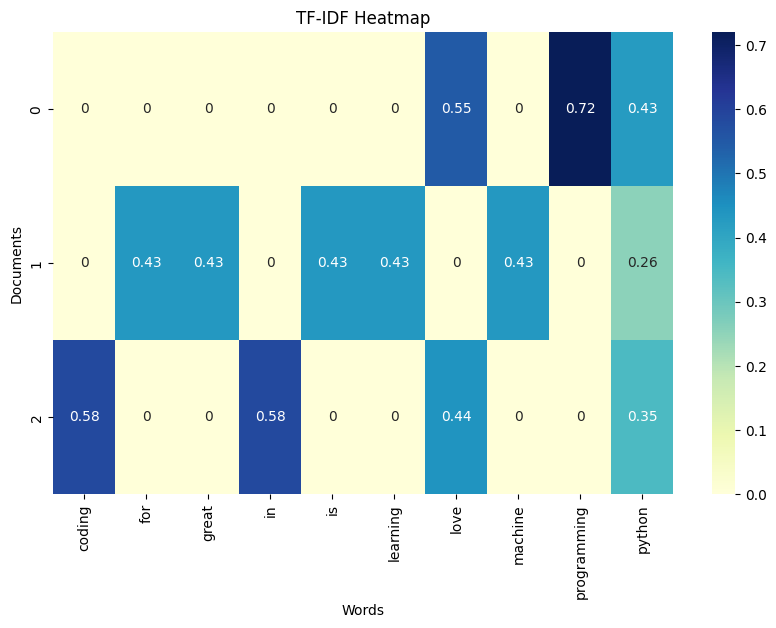

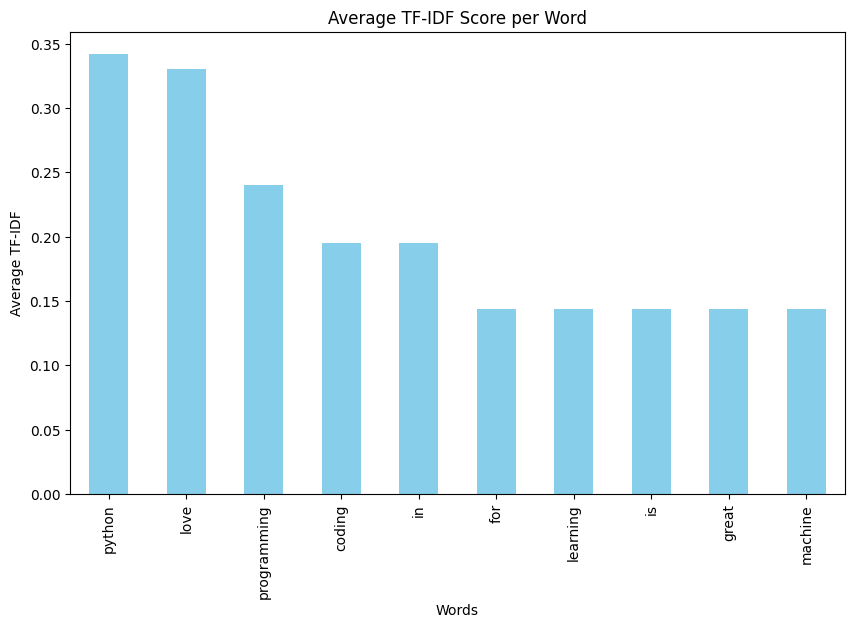

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# corpus
corpus = [
    "I love python programming",
    "Python is great for machine learning",
    "i love coding in python"
]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Convert to DataFrame
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("TF-IDF DataFrame:\n")
print(df_tfidf)

# --- Heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(df_tfidf, annot=True, cmap="YlGnBu", xticklabels=vectorizer.get_feature_names_out())
plt.title("TF-IDF Heatmap")
plt.xlabel("Words")
plt.ylabel("Documents")
plt.show()

# --- Barplot (mean TF-IDF score for each word) ---
plt.figure(figsize=(10, 6))
df_tfidf.mean().sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Average TF-IDF Score per Word")
plt.ylabel("Average TF-IDF")
plt.xlabel("Words")
plt.show()

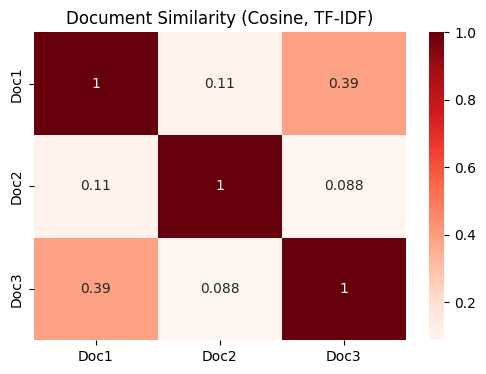

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

#Cosine similarity between docs
cos_sim= cosine_similarity(X)

#Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cos_sim,annot=True, cmap="Reds", xticklabels=["Doc1", "Doc2", "Doc3"], yticklabels=["Doc1", "Doc2", "Doc3"])
plt.title("Document Similarity (Cosine, TF-IDF)")
plt.show()

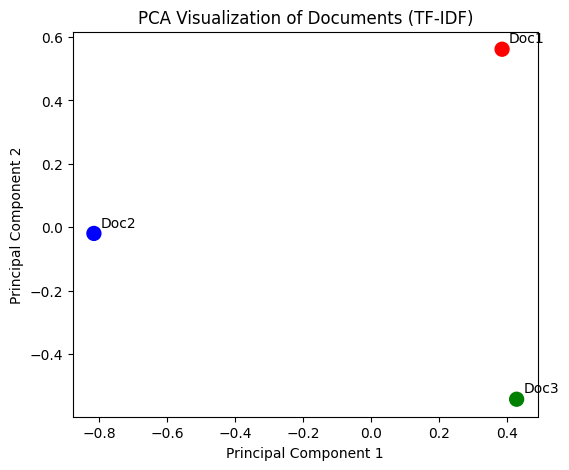

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Corpus

corpus = [
   "I love Python programming",

   "Python is great for machine learning",

   "I love coding in Python"
]
#TF-IDF

vectorizer= TfidfVectorizer()
X =vectorizer.fit_transform(corpus)

#PCA reduce TF-IDF to 20
pca= PCA(n_components=2)
X_pca=pca.fit_transform(X.toarray())

#Plotting

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=["red", "blue", "green"], s=100)

#Add document labels

for i, txt in enumerate (["Doc1", "Doc2", "Doc3"]):
       plt.annotate(txt, (X_pca[i,0]+0.02, X_pca[i,1]+0.02))

plt.title("PCA Visualization of Documents (TF-IDF)")
plt.xlabel("Principal Component 1")

plt.ylabel("Principal Component 2")

plt.show()

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Download NLTK resources (run only once) (already done)
# Preprocessing: stopwords lemmatization

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def custom_tokenizer(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return tokens

# Corpus

corpus = [
    "I love Python programming",
    "Python is great for machine learning",
    "I love coding in Python ad ML",
    "Machine learning enables artificial intelligence",
    "Deep learning and Python are widely used in AI"
]

#TF-IDF with custom tokenizer

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
X = vectorizer.fit_transform(corpus)

# Convert to DataFrame

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


         ad        ai  artificial    coding      deep   enables     great  \
0  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000  0.643246   
2  0.501992  0.000000    0.000000  0.501992  0.000000  0.000000  0.000000   
3  0.000000  0.000000    0.493899  0.000000  0.000000  0.493899  0.000000   
4  0.000000  0.458065    0.000000  0.000000  0.458065  0.000000  0.000000   

   intelligence  learning      love   machine        ml  programming  \
0      0.000000  0.000000  0.575063  0.000000  0.000000     0.712775   
1      0.000000  0.430789  0.000000  0.518967  0.000000     0.000000   
2      0.000000  0.000000  0.405004  0.000000  0.501992     0.000000   
3      0.493899  0.330770  0.000000  0.398475  0.000000     0.000000   
4      0.000000  0.306771  0.000000  0.000000  0.000000     0.000000   

     python      used    widely  
0  0.401565  0.000000  0.000000  
1  0.362393  0.000000  0.000000  
2 